In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv('kc_house_data.csv') 


In [2]:
df.drop(['id'] , axis = 1 , inplace = True)
df.drop_duplicates(keep = 'first',inplace = True)
df.drop(['date'] , axis = 1 , inplace = True)
df = df[['bedrooms','bathrooms','sqft_living','view','grade','sqft_above','sqft_basement','lat','sqft_living15' ,'price']]
df.head()

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15,price
0,3,1.00,1180,0,7,1180,0,47.5112,1340,221900.0
1,3,2.25,2570,0,7,2170,400,47.7210,1690,538000.0
2,2,1.00,770,0,6,770,0,47.7379,2720,180000.0
3,4,3.00,1960,0,7,1050,910,47.5208,1360,604000.0
4,3,2.00,1680,0,8,1680,0,47.6168,1800,510000.0


In [3]:
df.shape

(21613, 10)

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
X.shape

(21613, 9)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
import numpy as np
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)

X_train = (X_train - mu ) / sigma

#We use the same mean and SD as the one of X_train as we dont know the mean of X_test
X_test = (X_test - mu ) / sigma

#Standardizing the y_train data
mu_y = np.mean(y_train, 0)
sigma_y = np.std(y_train, 0, ddof = 0)

y_train = (y_train - mu_y ) / sigma_y

In [8]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
y_pred = np.zeros(y_test.shape)
y_train.shape, y_test.shape,y_pred.shape

((17290, 1), (4323, 1), (4323, 1))

In [15]:
error_rate = []

for i in range(1,40):
    for row in range(len(X_test)):
        weighted_points = np.zeros(i)
        sum1 = 0
        euclidian_distance = np.sqrt(np.sum((X_train - X_test[row])**2, axis = 1 ))
        sorted_distance = euclidian_distance[np.argsort(euclidian_distance, axis = 0)[:i]]
        closest_points = y_train[np.argsort(euclidian_distance, axis = 0)[:i]]
        j = 0
        for k in range(i,0,-1):
            weighted_points[j] = closest_points[j]*k
            j += 1
            sum1 += k

        y_pred[row] = sum(weighted_points)/sum1* sigma_y + mu_y
    
    from sklearn.metrics import mean_squared_error
    a = mean_squared_error(y_test, y_pred)
    print('For k = ',i," ",a)
    error_rate.append(a).

For k =  1   56889707805.099464
For k =  2   40909234324.95605
For k =  3   36442402851.33008
For k =  4   34198055460.33652
For k =  5   33027025581.12999
For k =  6   32069878842.264957
For k =  7   31412430308.061516
For k =  8   30926120753.941166
For k =  9   30529734640.984573
For k =  10   30181548820.62801
For k =  11   29951801976.739067
For k =  12   29814870968.503967
For k =  13   29745614012.891678
For k =  14   29720526258.22026
For k =  15   29677358671.728416
For k =  16   29662346883.282825
For k =  17   29678505681.27026
For k =  18   29689578685.177265
For k =  19   29702919693.14742
For k =  20   29735507466.654552
For k =  21   29792933677.283577
For k =  22   29823591761.36316
For k =  23   29854651585.172585
For k =  24   29899347888.41968
For k =  25   29951724031.614765
For k =  26   30007259333.383915
For k =  27   30064430871.39586
For k =  28   30117163546.91595
For k =  29   30174897459.276848
For k =  30   30234250117.214043
For k =  31   30299564522.00778

Text(0, 0.5, 'Error Rate')

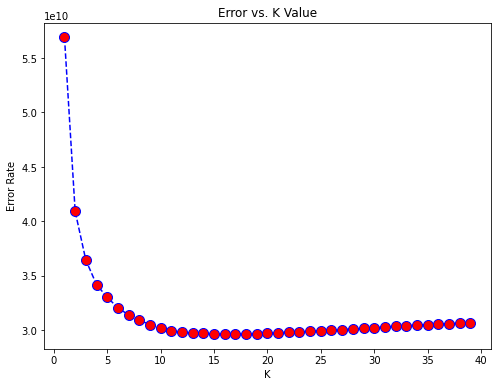

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
n_neigh = 18

for row in range(len(X_test)):
    weighted_points = np.zeros(n_neigh)
    sum1 = 0
    euclidian_distance = np.sqrt(np.sum((X_train - X_test[row])**2, axis = 1 ))
    sorted_distance = euclidian_distance[np.argsort(euclidian_distance, axis = 0)[:n_neigh]]
    closest_points = y_train[np.argsort(euclidian_distance, axis = 0)[:n_neigh]]
    j = 0
    for i in range(n_neigh,0,-1):
        weighted_points[j] = closest_points[j]*i
        j += 1
        sum1 += i
    
    y_pred[row] = sum(weighted_points)/sum1* sigma_y + mu_y

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.750348866040803

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

29689578685.177265